# WEEK - 4 DATA SCIENCE
# Advanced Web Scraping and Data Processing

# 1.  Web Scraping with API Integration

# 1.1 Importing Important Libraries

In [48]:
import requests
import json

# 1.2 Url

In [49]:
url = "https://api.github.com/users/octocat/repos"

# 1.3   Sending GET request

In [50]:
# Send GET request to the API
response = requests.get(url)

# 1.4 Checking Responce 

In [51]:
# Check if the response is successful (status code 200)
if response.status_code == 200:
    data = response.json()
    # Convert data to JSON
    with open('github_repos.json', 'w') as f:
        json.dump(data, f, indent=4)
    print("Data saved to github_repos.json")
else:
    print("Failed to retrieve data:", response.status_code)

Data saved to github_repos.json


# 1.5 Processing & Storing the Data in Structured Formats like CSV or JSON:

In [52]:
import pandas as pd

# Load the JSON data into a pandas DataFrame
df = pd.read_json('github_repos.json')

# Save the data as a CSV file
df.to_csv('github_repos.csv', index=False)
print("Data saved to github_repos.csv")

Data saved to github_repos.csv


#  2. Handling Dynamic Content with Selenium 

# 2.1 Importing Important Libraries

In [53]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import csv

# 2.2 Setting Up Web Driver

In [54]:
# Set up WebDriver (make sure to have the ChromeDriver executable in your PATH)
driver = webdriver.Chrome()

# 2.3 Giving Website Name

In [55]:
# Open the website
driver.get("https://breakout.com.pk/collections/men")

# Wait for the initial content to load
time.sleep(3)

# 2.4 Scrolling Down the Page to Load More Products

In [56]:
# Scroll down the page to load more products
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)  # Wait for new items to load
    
    # Check if the page height changed
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height



# 2.5 Finding Product Names and its Prices

In [57]:
# Find the product names, new prices, and old prices
product_name_elements = driver.find_elements(By.XPATH, '//p[@class="product-item__title"]')
new_price_elements = driver.find_elements(By.XPATH, '//span[@class="new-price"]')
old_price_elements = driver.find_elements(By.XPATH, '//span[@class="old-price"]')

# Extract text from the elements
product_names = [element.text for element in product_name_elements]
new_prices = [element.text for element in new_price_elements]
old_prices = [element.text for element in old_price_elements]

# Combine data into a structured format
products = []
for name, new_price, old_price in zip(product_names, new_prices, old_prices):
    products.append({
        'Product Name': name,
        'New Price': new_price,
        'Old Price': old_price
    })

# Print the products
print(products)

[{'Product Name': 'FAUX SUEDE LEATHER JACKET', 'New Price': 'PKR 10,499', 'Old Price': 'PKR 14,999'}, {'Product Name': 'FAUX SUEDE LEATHER JACKET', 'New Price': 'PKR 10,499', 'Old Price': 'PKR 14,999'}, {'Product Name': 'BUTTON DOWN SHIRT', 'New Price': 'PKR 2,729', 'Old Price': 'PKR 3,899'}, {'Product Name': 'BAGGY FIT POPOVER HOODIE', 'New Price': 'PKR 4,199', 'Old Price': 'PKR 5,999'}, {'Product Name': 'BAGGY FIT POPOVER HOODIE', 'New Price': 'PKR 4,199', 'Old Price': 'PKR 5,999'}, {'Product Name': 'POPOVER HOODIE', 'New Price': 'PKR 4,199', 'Old Price': 'PKR 5,999'}, {'Product Name': 'POPOVER HOODIE', 'New Price': 'PKR 4,199', 'Old Price': 'PKR 5,999'}, {'Product Name': 'BAGGY FIT TROUSER', 'New Price': 'PKR 3,289', 'Old Price': 'PKR 4,699'}, {'Product Name': 'BAGGY FIT TROUSER', 'New Price': 'PKR 3,289', 'Old Price': 'PKR 4,699'}, {'Product Name': 'TEXTURED WOOL BLEND COAT', 'New Price': 'PKR 8,399', 'Old Price': 'PKR 11,999'}, {'Product Name': 'WOOL BLEND JACKET', 'New Price': 'P

# 2.6 Saving Data into CSV Format & Closing Browser

In [58]:
# Save the data into CSV
with open('products.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["Product Name", "New Price", "Old Price"])
    writer.writeheader()
    writer.writerows(products)

print("Data saved to products.csv")

# Close the browser after scraping
driver.quit()

Data saved to products.csv


# 3: Data Cleaning and Analysis

In [59]:
import pandas as pd

# Load the scraped CSV data
df = pd.read_csv('products.csv')
print(df)

                          Product Name   New Price   Old Price
0            FAUX SUEDE LEATHER JACKET  PKR 10,499  PKR 14,999
1            FAUX SUEDE LEATHER JACKET  PKR 10,499  PKR 14,999
2                    BUTTON DOWN SHIRT   PKR 2,729   PKR 3,899
3             BAGGY FIT POPOVER HOODIE   PKR 4,199   PKR 5,999
4             BAGGY FIT POPOVER HOODIE   PKR 4,199   PKR 5,999
..                                 ...         ...         ...
766                  CONTRAST TRAINERS   PKR 4,999   PKR 9,999
767                            SANDALS   PKR 2,699   PKR 5,399
768                           SNEAKERS   PKR 2,749   PKR 5,499
769                             SANDAL   PKR 2,699   PKR 5,399
770  CONTRAST POLYESTER PADDING JACKET   PKR 5,499  PKR 10,999

[771 rows x 3 columns]


# 3.1 Checking Missing Values

In [60]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Product Name    0
New Price       0
Old Price       0
dtype: int64


# 3.2 Checking Duplicate Rows

In [61]:
print(df.duplicated().sum())

502


# 3.3 Removing Duplicates

In [62]:
df.drop_duplicates(inplace=True)
print(df)

                          Product Name   New Price   Old Price
0            FAUX SUEDE LEATHER JACKET  PKR 10,499  PKR 14,999
2                    BUTTON DOWN SHIRT   PKR 2,729   PKR 3,899
3             BAGGY FIT POPOVER HOODIE   PKR 4,199   PKR 5,999
5                       POPOVER HOODIE   PKR 4,199   PKR 5,999
7                    BAGGY FIT TROUSER   PKR 3,289   PKR 4,699
..                                 ...         ...         ...
765                            SANDALS   PKR 2,699   PKR 5,399
766                  CONTRAST TRAINERS   PKR 4,999   PKR 9,999
768                           SNEAKERS   PKR 2,749   PKR 5,499
769                             SANDAL   PKR 2,699   PKR 5,399
770  CONTRAST POLYESTER PADDING JACKET   PKR 5,499  PKR 10,999

[269 rows x 3 columns]


# 3.4 Saving Cleaned Data

In [63]:
# Save the cleaned data
df.to_csv('cleaned_products.csv', index=False)
print("Cleaned data saved to cleaned_products.csv")

Cleaned data saved to cleaned_products.csv


# 3.5 Further Pre-processing for Visualization (Removing PKR from Prices Columns) 

In [64]:
# Remove "PKR" from the 'New Price' and 'Old Price' columns
df['New Price'] = df['New Price'].str.replace('PKR ', '', regex=False)
df['Old Price'] = df['Old Price'].str.replace('PKR ', '', regex=False)

print(df['New Price'])
print(df['Old Price'])

0      10,499
2       2,729
3       4,199
5       4,199
7       3,289
        ...  
765     2,699
766     4,999
768     2,749
769     2,699
770     5,499
Name: New Price, Length: 269, dtype: object
0      14,999
2       3,899
3       5,999
5       5,999
7       4,699
        ...  
765     5,399
766     9,999
768     5,499
769     5,399
770    10,999
Name: Old Price, Length: 269, dtype: object


# 3.6 Removing Commas from Prices Columns 

In [65]:
# Remove commas and convert to numeric
df['New Price'] = df['New Price'].str.replace(',', '').astype(float)
df['Old Price'] = df['Old Price'].str.replace(',', '').astype(float)

print(df['New Price'])
print(df['Old Price'])

0      10499.0
2       2729.0
3       4199.0
5       4199.0
7       3289.0
        ...   
765     2699.0
766     4999.0
768     2749.0
769     2699.0
770     5499.0
Name: New Price, Length: 269, dtype: float64
0      14999.0
2       3899.0
3       5999.0
5       5999.0
7       4699.0
        ...   
765     5399.0
766     9999.0
768     5499.0
769     5399.0
770    10999.0
Name: Old Price, Length: 269, dtype: float64


# 4. Analyze trends in the data (e.g., price fluctuations):

In [66]:
# Calculate the discount percentage
df['Discount Percentage'] = ((df['Old Price'] - df['New Price']) / df['Old Price']) * 100

# Basic statistics
summary = df[['Old Price', 'New Price', 'Discount Percentage']].describe()
print("Basic Statistics Summary:")
print(summary)

# Calculate the average discount
average_discount = df['Discount Percentage'].mean()
print(f"\nAverage Discount Percentage: {average_discount:.2f}%")

# Calculate the total amount discounted
total_discounted_amount = (df['Old Price'] - df['New Price']).sum()
print(f"\nTotal Discount Amount: {total_discounted_amount}")

Basic Statistics Summary:
          Old Price     New Price  Discount Percentage
count    269.000000    269.000000           269.000000
mean    5807.550186   3791.973978            33.130273
std     3539.030948   2137.516013             7.273974
min      799.000000    399.000000            30.001875
25%     3499.000000   2449.000000            30.005456
50%     4999.000000   3359.000000            30.006978
75%     5999.000000   4199.000000            30.012005
max    19999.000000  11199.000000            50.062578

Average Discount Percentage: 33.13%

Total Discount Amount: 542190.0


# 5. Visualization

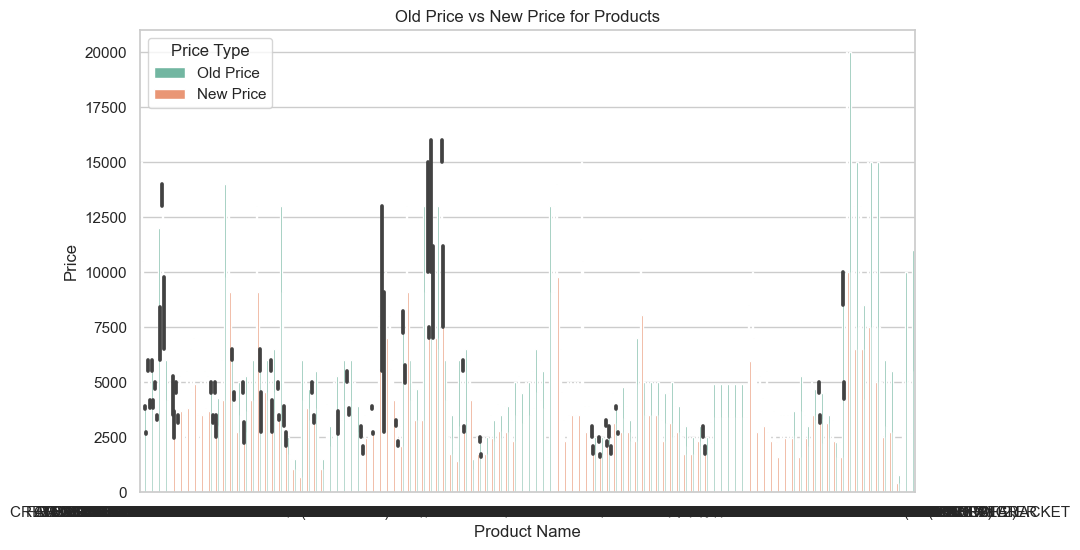

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format for easier plotting with Seaborn
df_melted = df.melt(id_vars='Product Name', value_vars=['Old Price', 'New Price'], 
                    var_name='Price Type', value_name='Price')

# Set Seaborn style for a cleaner plot
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Name', y='Price', hue='Price Type', data=df_melted, palette='Set2')

# Labels and title
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Old Price vs New Price for Products')

# Display the plot
plt.show()

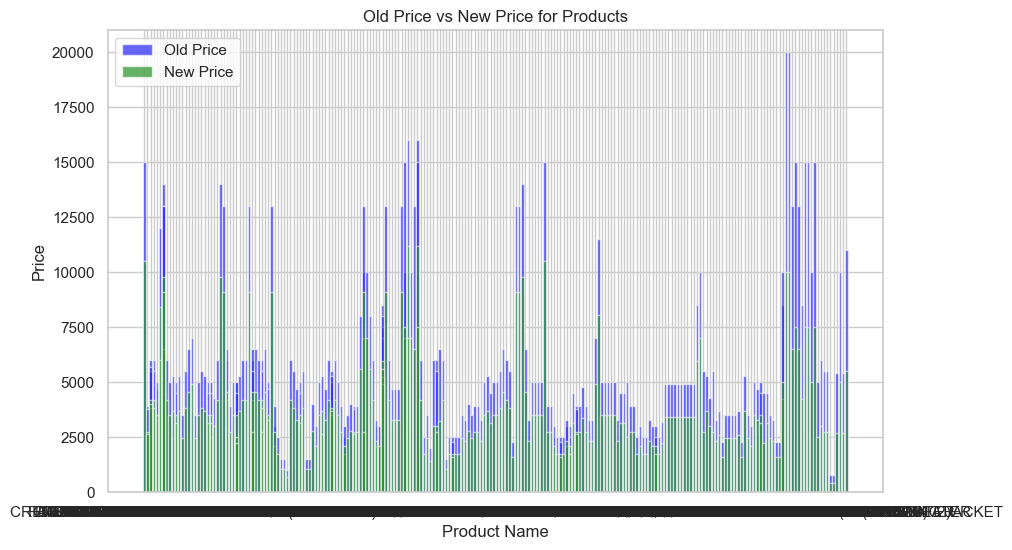

In [68]:
# Set plot style
sns.set(style="whitegrid")

# Bar plot for Old Price vs New Price
plt.figure(figsize=(10, 6))
plt.bar(df['Product Name'], df['Old Price'], label='Old Price', alpha=0.6, color='blue')
plt.bar(df['Product Name'], df['New Price'], label='New Price', alpha=0.6, color='green')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Old Price vs New Price for Products')
plt.legend()
plt.show()

# Line plot for Discount Percentage

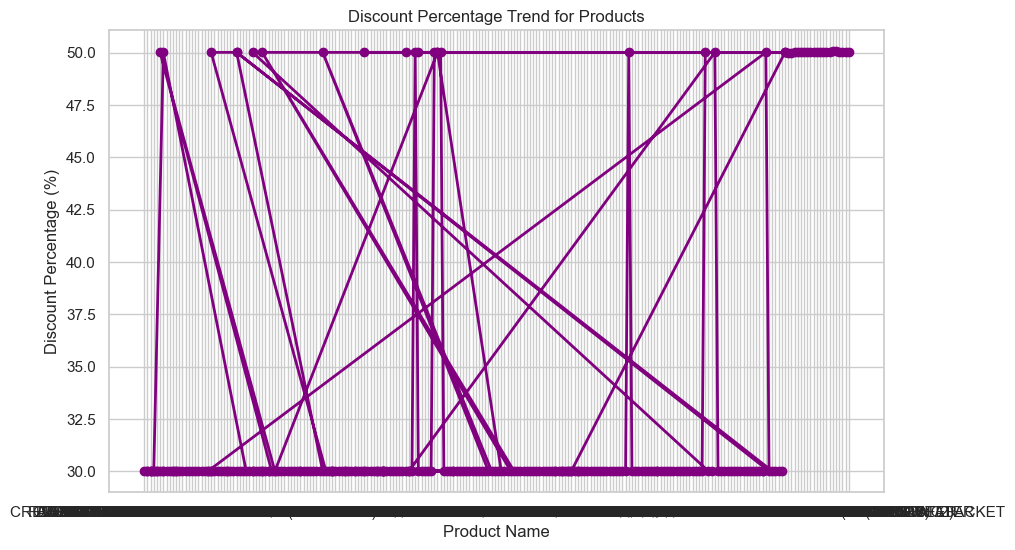

In [69]:
# Line plot for Discount Percentage
plt.figure(figsize=(10, 6))
plt.plot(df['Product Name'], df['Discount Percentage'], marker='o', color='purple', linestyle='-', linewidth=2)
plt.xlabel('Product Name')
plt.ylabel('Discount Percentage (%)')
plt.title('Discount Percentage Trend for Products')
plt.grid(True)
plt.show()

# 6. Conclusion


**Advanced Web Scraping and Data Processing** techniques, equipping us with valuable skills in API integration. Through API calls, we successfully retrieved data from GitHub and processed it into structured formats such as CSV for analysis.

**Selenium** enabled us to scrape dynamic product data from an e-commerce website, extracting key information like product names, prices, and discounts. After addressing data quality issues, such as missing values and duplicates, we cleaned the dataset and converted price columns into a numeric format for meaningful analysis. The analysis revealed an **average discount of 33.13%**, with a **total discount amount of 542,190 PKR** across the products. 

The **visualizations**, including a bar plot comparing old and new prices and a line plot showing discount trends, helped to effectively communicate the insights gained.

Overall, the session highlighted the importance of web scraping, data cleaning, and visualization techniques in transforming raw data into actionable business insights.